# 'Niner' analysis

In [39]:
import os
import numpy as np
import pandas as pd   # module to work with data in DataFrames.
import seaborn as sns  # module to plot DataFrames in an easy way
import matplotlib.pyplot as plt
from pathlib import Path

In [40]:
# seaborn comes with default presets (called 'contents') for figure's aesthetics, 
# such as the font size, figure size etc.

#sns.set_context('talk') # try: 'talk', 'poster', 'notebook'
sns.set_theme(style="ticks", palette="pastel")

## Get the result files

In [41]:
# Get current result files.
result_dir = Path('../nines/results').absolute()
result_file_names = os.listdir(result_dir)
result_file_names = list(filter(lambda name: str.startswith(name, 'result'), result_file_names))

single_result_files_paths = []
for name in result_file_names:
    single_result_files_paths.append(result_dir / name)

print(f"Number observer: {len(single_result_files_paths)}")

Number observer: 23


Write result files to dataframe

In [42]:
df = pd.DataFrame()
for index, path in enumerate(single_result_files_paths):
    print(index, path)
    df_tmp = pd.read_csv(path)
    df_tmp['observer'] = index
    df = pd.concat((df, df_tmp))

df.columns = ['test_image', '0', '1', '2', '3', '4', '5', '6', '7', '8', 'choosen', 'observer']


0 /home/max/git/PerceptionAndImageQuality/analysis/../nines/results/results_niner_okan.csv
1 /home/max/git/PerceptionAndImageQuality/analysis/../nines/results/result_20220125-182957_max_a.csv
2 /home/max/git/PerceptionAndImageQuality/analysis/../nines/results/results_niner_kat.csv
3 /home/max/git/PerceptionAndImageQuality/analysis/../nines/results/result_20220118-182237_max.csv
4 /home/max/git/PerceptionAndImageQuality/analysis/../nines/results/result_20220120-erdem.csv
5 /home/max/git/PerceptionAndImageQuality/analysis/../nines/results/result_20220121-221605_marius_03.csv
6 /home/max/git/PerceptionAndImageQuality/analysis/../nines/results/result_20220119-161616_max_cs.csv
7 /home/max/git/PerceptionAndImageQuality/analysis/../nines/results/result_20220125-erdem1.csv
8 /home/max/git/PerceptionAndImageQuality/analysis/../nines/results/results_niner_son.csv
9 /home/max/git/PerceptionAndImageQuality/analysis/../nines/results/result_20220125-erdem2.csv
10 /home/max/git/PerceptionAndImageQua

## Clean up of image names

In [43]:
df['test_image'] = [s.split('_')[0] for s in df['test_image'].tolist()]
df = df.sort_values(by='test_image', ascending=True, key=lambda col: [int(img[1:]) for img in col])

In [44]:
list_of_used_images = [f"H{index}" for index in range(30)]
list_of_used_images += [f"I{index:02d}" for index in [1, 3, 4, 6, 7, 8, 12, 13, 14, 15 ,16, 20, 21, 22, 23]]
#df[df["test_image"] == "H12"]
assert len(list_of_used_images) == 30 + 15

In [45]:
df = df[df["test_image"].isin(list_of_used_images)]

# Sanity checks
We expect 30 historic and 15 modern images used during tests.
Each result file  from each observer shall be 30 + 15 images long.

In [46]:
# sanity checks: how many groups do you expect per categorical variable?
assert len(df['test_image'].unique()) == 30 + 15

# Check number of observers.
assert len(df['observer'].unique()) == len(result_file_names)

# Check length of result from each observer.
for observer_id in df['observer'].unique():
    assert len(df[df['observer'] == observer_id]) == 30 + 15
    assert len(df[df['observer'] == observer_id]['test_image'].unique()) == 30 + 15

In [47]:
max_factor = np.ceil(max(df[[str(i) for i in range(9)]].max(axis=0)))


### Devide dataframe into historic and modern images
And verify result.

In [48]:
df_historic = df[df['test_image'].str.startswith('H')]
df_modern = df[df['test_image'].str.startswith('I')]

assert len(df_historic['test_image'].unique()) == 30
assert len(df_modern['test_image'].unique()) == 15

### Historic plots

Barplot.

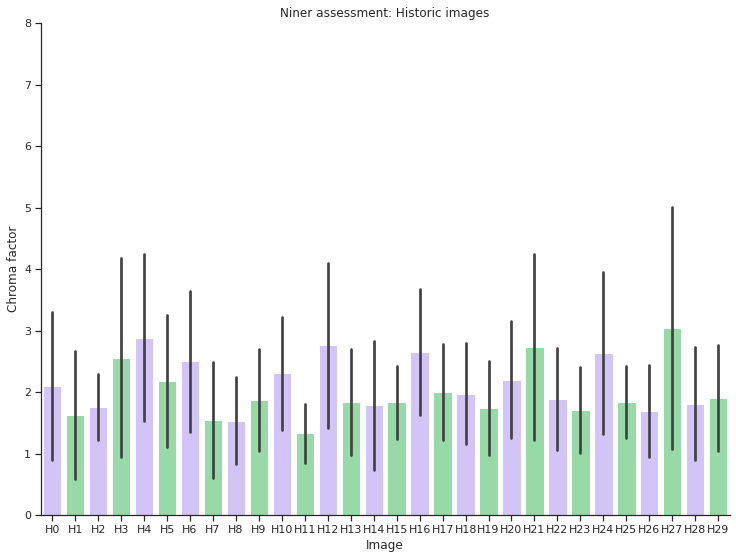

In [49]:
g = sns.catplot(
    x='test_image',
    y='choosen',
    data=df_historic,
    kind='bar',
    ci='sd',
    palette=["m", "g"]
)

g.figure.set_size_inches(11.7, 8.27)
g.set_axis_labels("Image", "Chroma factor")

g.set(ylim = (0,max_factor))
g.set(title="Niner assessment: Historic images")


Boxplot

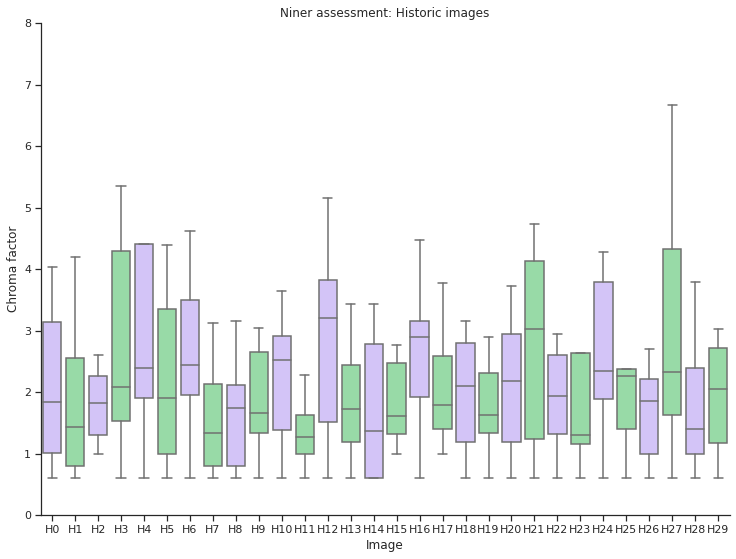

In [50]:
g = sns.catplot(
    x='test_image',
    y='choosen',
    data=df_historic,
    kind='box',
    ci='sd',
    #color='#e34a33')
    palette=["m", "g"]
)

g.fig.set_size_inches(11.7, 8.27)

g.set(ylim = (0,max_factor))

g.set_axis_labels("Image", "Chroma factor")
g.set(title="Niner assessment: Historic images")

sns.despine()

### Modern plots

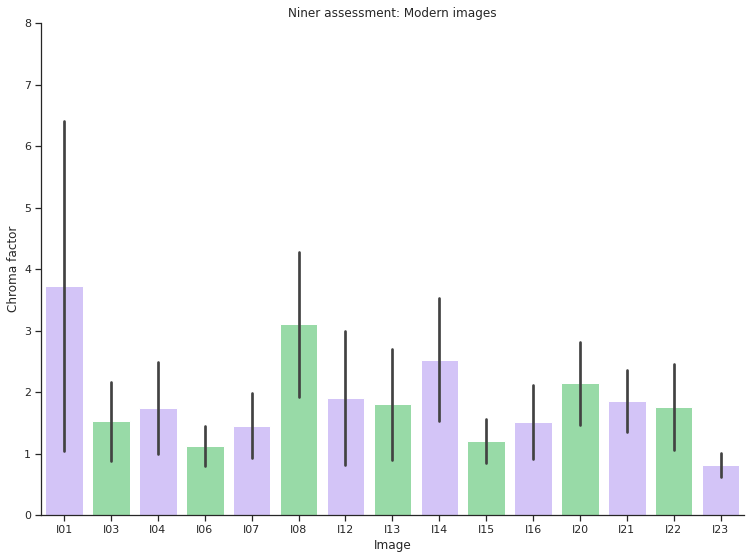

In [51]:
g = sns.catplot(x='test_image', y='choosen', data=df_modern,
                kind='bar', ci='sd', palette=["m", "g"])

g.fig.set_size_inches(11.7, 8.27)

g.set(ylim = (0,max_factor))

g.set_axis_labels("Image", "Chroma factor")
g.set(title="Niner assessment: Modern images")
sns.despine()


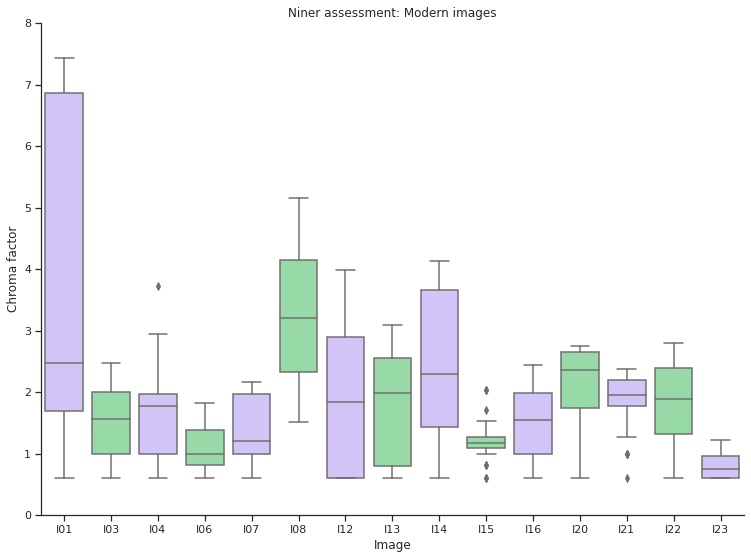

In [52]:
g = sns.catplot(x='test_image', y='choosen', data=df_modern,
                kind='box', ci='sd', 
                palette=["m", "g"])

g.fig.set_size_inches(11.7, 8.27)

g.set(ylim = (0,max_factor))

g.set_axis_labels("Image", "Chroma factor")
g.set(title="Niner assessment: Modern images")
sns.despine()

# Plots for both image groups

In [53]:
means = []
for img in df_historic["test_image"].unique():
    means.append((img, "H", np.mean(df_historic[df_historic["test_image"] == img])["choosen"]))

for img in df_modern["test_image"].unique():
    means.append((img, "I", np.mean(df_modern[df_modern["test_image"] == img])["choosen"]))
    
df_mean = pd.DataFrame(means)
df_mean.columns = ["test_image", "type", "mean"]
df_mean

,test_image,type,mean
0,H0,H,2.105217
1,H1,H,1.631739
2,H2,H,1.760000
3,H3,H,2.563478
4,H4,H,2.883913
5,H5,H,2.187391
6,H6,H,2.500435
7,H7,H,1.543913
8,H8,H,1.539565
9,H9,H,1.874348


Boxplot overall modern and historic images.

[[Text(0, 0, 'Historic'), Text(1, 0, 'Modern')]]

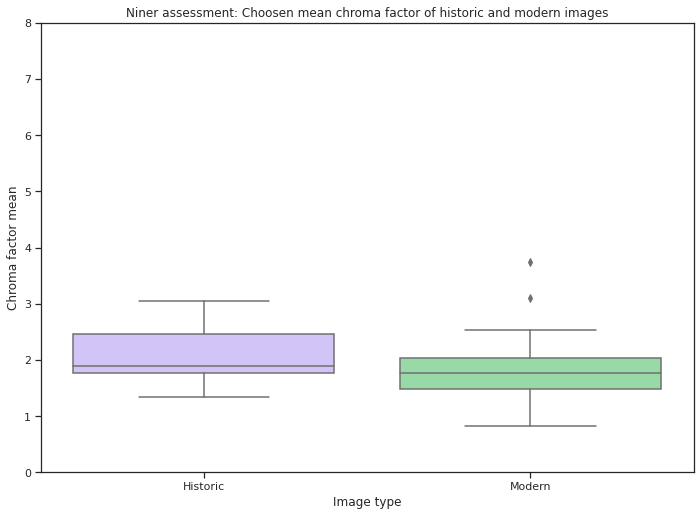

In [54]:
g = sns.boxplot(x="type", y="mean", palette=["m", "g"], data=df_mean)
g.set(title="Niner assessment: Choosen mean chroma factor of historic and modern images")
g.figure.set_size_inches(11.7, 8.27)
g.set(ylim = (0,max_factor))
g.set_xlabel("Image type")
g.set_ylabel("Chroma factor mean")
g.set(xticklabels=["Historic", "Modern"])